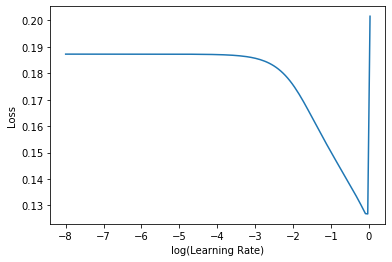

In [74]:
import torch
import torch.nn.functional as f
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)


# ------------------------------ find the approprite lr  ------------------------------
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):  # 初始化信息
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  
        self.predict = torch.nn.Linear(n_hidden, n_output)  
    def forward(self, x):  
        x = f.relu(self.hidden(x)) 
        x = self.predict(x)
        return x
    
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())  
trn_loader =[[x,y] for _ in range(150)]

def find_lr(init_value = 1e-8, final_value=10., beta = 0.98):
    num = len(trn_loader)-1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer.param_groups[0]['lr'] = lr
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    for data in trn_loader:
        batch_num += 1
        #As before, get the loss for this mini-batch of inputs/outputs
        inputs,labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) *loss.item()
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        #Do the SGD step
        loss.backward()
        optimizer.step()
        #Update the lr for the next step
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
    return log_lrs, losses

# flag = 0
flag = 1
if flag:
    net = Net(1, 10, 1)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

    criterion = torch.nn.MSELoss()
    logs,losses = find_lr() 

    plt.plot(logs[:],losses[:])
    plt.xlabel("log(Learning Rate)")
    plt.ylabel("Loss")


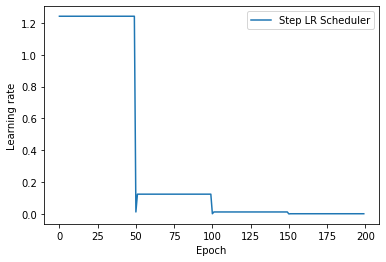

In [76]:
# ------------------------------ 1 Step LR ------------------------------
# flag = 0
flag = 1
if flag:

    scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)  # 设置学习率下降策略

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):

        lr_list.append(scheduler_lr.get_lr())
        epoch_list.append(epoch)

        for i in range(iteration):

            loss = torch.pow((weights - target), 2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        scheduler_lr.step()

    plt.plot(epoch_list, lr_list, label="Step LR Scheduler")
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()

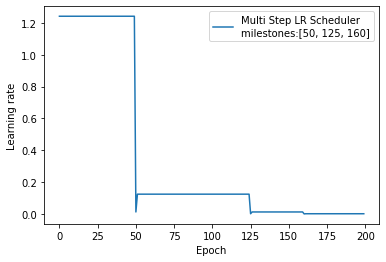

In [73]:
# ------------------------------ 2 Multi Step LR ------------------------------
# flag = 0
flag = 1
if flag:

    milestones = [50, 125, 160]
    scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):

        lr_list.append(scheduler_lr.get_lr())
        epoch_list.append(epoch)

        for i in range(iteration):

            loss = torch.pow((weights - target), 2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        scheduler_lr.step()

    plt.plot(epoch_list, lr_list, label="Multi Step LR Scheduler\nmilestones:{}".format(milestones))
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()



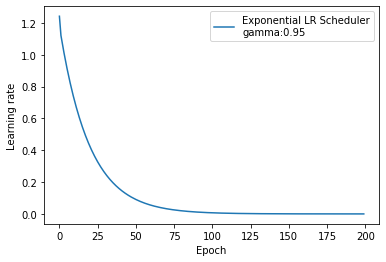

In [71]:
# ------------------------------ 3 Exponential LR ------------------------------
# flag = 0
flag = 1
if flag:

    gamma = 0.95
    scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):

        lr_list.append(scheduler_lr.get_lr())
        epoch_list.append(epoch)

        for i in range(iteration):

            loss = torch.pow((weights - target), 2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        scheduler_lr.step()

    plt.plot(epoch_list, lr_list, label="Exponential LR Scheduler\ngamma:{}".format(gamma))
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()



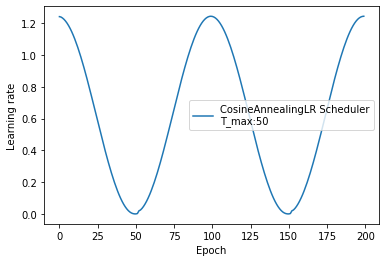

In [64]:
# ------------------------------ 4 Cosine Annealing LR ------------------------------
# flag = 0
flag = 1
if flag:

    t_max = 50
    scheduler_lr = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=t_max, eta_min=0.)

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):

        lr_list.append(scheduler_lr.get_lr())
        epoch_list.append(epoch)

        for i in range(iteration):

            loss = torch.pow((weights - target), 2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        scheduler_lr.step()

    plt.plot(epoch_list, lr_list, label="CosineAnnealingLR Scheduler\nT_max:{}".format(t_max))
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()




In [65]:
# ------------------------------ 5 Reduce LR On Plateau ------------------------------
flag = 0
# flag = 1
if flag:
    loss_value = 0.5
    accuray = 0.9

    factor = 0.1
    mode = "min"
    patience = 10
    cooldown = 10
    min_lr = 1e-4
    verbose = True

    scheduler_lr = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=factor, mode=mode, patience=patience,
                                                        cooldown=cooldown, min_lr=min_lr, verbose=verbose)

    for epoch in range(max_epoch):
        for i in range(iteration):

            # train(...)

            optimizer.step()
            optimizer.zero_grad()

        if epoch == 5:
            loss_value = 0.4

        scheduler_lr.step(loss_value)




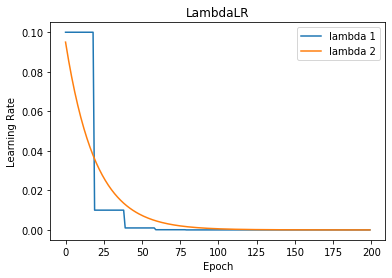

In [77]:
# ------------------------------ 6 lambda ------------------------------
# flag = 0
flag = 1
if flag:

    lr_init = 0.1

    weights_1 = torch.randn((6, 3, 5, 5))
    weights_2 = torch.ones((5, 5))

    optimizer = optim.SGD([
        {'params': [weights_1]},
        {'params': [weights_2]}], lr=lr_init)

    lambda1 = lambda epoch: 0.1 ** (epoch // 20)
    lambda2 = lambda epoch: 0.95 ** epoch

    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda1, lambda2])

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):
        for i in range(iteration):

            # train(...)

            optimizer.step()
            optimizer.zero_grad()

        scheduler.step()

        lr_list.append(scheduler.get_last_lr())
        epoch_list.append(epoch)

#         print('epoch:{:5d}, lr:{}'.format(epoch, scheduler.get_lr()))

    plt.plot(epoch_list, [i[0] for i in lr_list], label="lambda 1")
    plt.plot(epoch_list, [i[1] for i in lr_list], label="lambda 2")
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")
    plt.title("LambdaLR")
    plt.legend()
    plt.show()

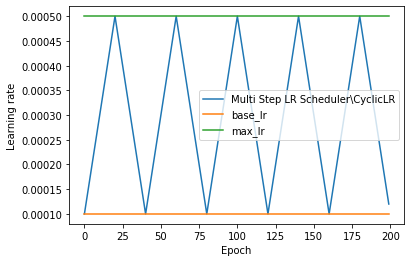

In [58]:
# ------------------------------ 7 CyclicLR ------------------------------
# flag = 0
flag = 1
if flag:
    base_lr = 1e-4
    max_lr =  5e-4
    scheduler_lr = optim.lr_scheduler.CyclicLR(optimizer, base_lr, max_lr, step_size_up=20, step_size_down=20, 
                                               mode='exp_range',
                                               gamma=1.0, scale_fn=None, scale_mode='iterations', 
                                               cycle_momentum=False, base_momentum=0.8, max_momentum=0.9)

    lr_list, epoch_list = list(), list()
    for epoch in range(max_epoch):

        lr_list.append(scheduler_lr.get_lr()[0])
       
        epoch_list.append(epoch)

        for i in range(iteration):

            loss = torch.pow((weights - target), 2)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        scheduler_lr.step()

    base_lr_list = np.zeros([epoch+1,1]) + base_lr
    max_lr_list = np.zeros([epoch+1,1]) + max_lr
    plt.plot(epoch_list, lr_list, label = "Multi Step LR Scheduler\CyclicLR")
    plt.plot(epoch_list, base_lr_list, label = "base_lr")
    plt.plot(epoch_list, max_lr_list, label = "max_lr")
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.show()